In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [98]:
df = pd.read_csv('E:\\Datasets\\titanic_toy.csv')

df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [99]:
df.isnull().sum() / len(df)

Age         0.198653
Fare        0.050505
Family      0.000000
Survived    0.000000
dtype: float64

In [100]:
df.isnull().mean()

Age         0.198653
Fare        0.050505
Family      0.000000
Survived    0.000000
dtype: float64

In [101]:

x = df.drop(columns = 'Survived')

y = df['Survived']


In [102]:
x_train,x_test,y_train,y_tets = train_test_split(x,y,test_size = .2,random_state =2)

In [103]:
x_train.isnull().sum()

Age       148
Fare       36
Family      0
dtype: int64

In [104]:
# Apply arbitrary values

x_train['Age_99'] = x_train['Age'].fillna(99)

x_train['Age_-1'] = x_train['Age'].fillna(-1)


x_train['Fare_99'] = x_train['Fare'].fillna(99)

x_train['Fare_-1'] = x_train['Fare'].fillna(-1)

In [105]:
x_train.isnull().sum()

Age        148
Fare        36
Family       0
Age_99       0
Age_-1       0
Fare_99      0
Fare_-1      0
dtype: int64

In [106]:
# We check the variance of original features and change features

print('The variance of original Age column is : ',x_train['Age'].var())
print('The variance of original Age_99 column is : ',x_train['Age_99'].var())
print('The variance of original Age_-1 column is : ',x_train['Age_-1'].var())

print('The variance of original Fare column is : ',x_train['Fare'].var())
print('The variance of original Fare_99 column is : ',x_train['Fare_99'].var())
print('The variance of original Fare_-1 column is : ',x_train['Fare_-1'].var())

The variance of original Age column is :  204.3495133904614
The variance of original Age_99 column is :  951.7275570187172
The variance of original Age_-1 column is :  318.0896202624484
The variance of original Fare column is :  2448.197913706318
The variance of original Fare_99 column is :  2536.0773428319685
The variance of original Fare_-1 column is :  2378.5676784883503


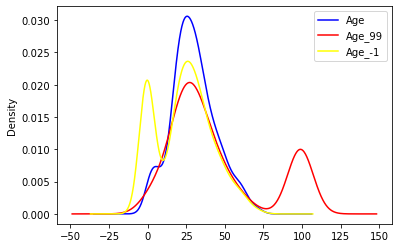

In [107]:
# check the distribuition

fig = plt.figure()
fig.add_subplot(111)

# original variable distribution
x_train['Age'].plot(kind='kde',color = 'blue')

# variable imputed with the 99
x_train['Age_99'].plot(kind = 'kde',color ='red')

# variable imputed with the -1
x_train['Age_-1'].plot(kind = 'kde',color = 'yellow')

plt.legend()
plt.show()

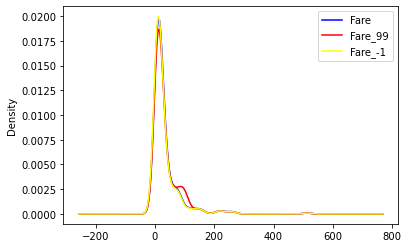

In [108]:
fig = plt.figure()
fig.add_subplot(111)

# original variable distribution
x_train['Fare'].plot(kind='kde',color = 'blue')

# variable imputed with the 99
x_train['Fare_99'].plot(kind = 'kde',color ='red')

# variable imputed with the -1
x_train['Fare_-1'].plot(kind = 'kde',color = 'yellow')

plt.legend()
plt.show()

In [109]:
# check the co variance
x_train.cov()

,Age,Fare,Family,Age_99,Age_-1,Fare_99,Fare_-1
Age,204.349513,70.719262,-6.498901,204.349513,204.349513,73.268412,63.321188
Fare,70.719262,2448.197914,17.258917,-101.671097,125.558364,2448.197914,2448.197914
Family,-6.498901,17.258917,2.735252,-7.387287,-4.149246,16.051452,16.553989
Age_99,204.349513,-101.671097,-7.387287,951.727557,-189.535540,-100.878826,-94.317400
Age_-1,204.349513,125.558364,-4.149246,-189.535540,318.089620,128.692715,114.394141
Fare_99,73.268412,2448.197914,16.051452,-100.878826,128.692715,2536.077343,2216.958409
Fare_-1,63.321188,2448.197914,16.553989,-94.317400,114.394141,2216.958409,2378.567678


In [110]:
# check the co relation
x_train.corr()

,Age,Fare,Family,Age_99,Age_-1,Fare_99,Fare_-1
Age,1.000000,0.092644,-0.299113,1.000000,1.000000,0.095527,0.084585
Fare,0.092644,1.000000,0.208268,-0.066273,0.142022,1.000000,1.000000
Family,-0.299113,0.208268,1.000000,-0.144787,-0.140668,0.192723,0.205233
Age_99,1.000000,-0.066273,-0.144787,1.000000,-0.344476,-0.064933,-0.062687
Age_-1,1.000000,0.142022,-0.140668,-0.344476,1.000000,0.143284,0.131514
Fare_99,0.095527,1.000000,0.192723,-0.064933,0.143284,1.000000,0.902648
Fare_-1,0.084585,1.000000,0.205233,-0.062687,0.131514,0.902648,1.000000


## Using Sciket Learn to impute arbitrary values

In [111]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .2,random_state = 2)

In [112]:
x_train.head()

,Age,Fare,Family
30,40.0,27.7208,0
10,4.0,16.7000,2
873,47.0,9.0000,0
182,9.0,31.3875,6
876,20.0,9.8458,0


In [113]:
imputer_99 = SimpleImputer(strategy = 'constant',fill_value = 99)
imputer_minus1 = SimpleImputer(strategy = 'constant',fill_value = 9999)

In [114]:
trf = ColumnTransformer([
    ('imputer_99',imputer_99,['Age']),
    ('imputer_minus1',imputer_minus1,['Age']),
    
     ('imputer_99_Fare',imputer_99,['Fare']),
    ('imputer_minus1_Fare',imputer_minus1,['Fare'])
    
    
],remainder = 'passthrough')

In [115]:
trf.fit(x_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer_99',
                                 SimpleImputer(fill_value=99,
                                               strategy='constant'),
                                 ['Age']),
                                ('imputer_minus1',
                                 SimpleImputer(fill_value=9999,
                                               strategy='constant'),
                                 ['Age']),
                                ('imputer_99_Fare',
                                 SimpleImputer(fill_value=99,
                                               strategy='constant'),
                                 ['Fare']),
                                ('imputer_minus1_Fare',
                                 SimpleImputer(fill_value=9999,
                                               strategy='constant'),
                                 ['Fare'])])

In [116]:
x_train_transformed = trf.transform(x_train)
x_test_transformed = trf.transform(x_test)

In [117]:
pd.DataFrame(x_train_transformed).sample(5)

,0,1,2,3,4
684,21.0,21.0,7.8000,7.8000,0.0
667,47.0,47.0,7.2500,7.2500,0.0
100,99.0,9999.0,35.5000,35.5000,0.0
332,22.0,22.0,10.5167,10.5167,0.0
117,99.0,9999.0,7.7333,7.7333,0.0


In [118]:
x_train

,Age,Fare,Family
30,40.0,27.7208,0
10,4.0,16.7000,2
873,47.0,9.0000,0
182,9.0,31.3875,6
876,20.0,9.8458,0
...,...,...,...
534,30.0,8.6625,0
584,NaN,8.7125,0
493,71.0,49.5042,0
527,NaN,221.7792,0


In [119]:
trf.named_transformers_['imputer_99'].statistics_

array([99.])

In [92]:
trf.named_transformers_.imputer_minus1.statistics_



array([9999.])